In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.layers import Dense,Conv2D,MaxPool2D,BatchNormalization,Flatten,LeakyReLU,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
final_model = load_model('final_model.h5')

W0718 16:22:24.489875 20412 deprecation_wrapper.py:119] From C:\Users\vibhu\Anaconda3\envs\ml\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 16:22:24.512814 20412 deprecation_wrapper.py:119] From C:\Users\vibhu\Anaconda3\envs\ml\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 16:22:24.566668 20412 deprecation_wrapper.py:119] From C:\Users\vibhu\Anaconda3\envs\ml\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 16:22:24.568664 20412 deprecation_wrapper.py:119] From C:\Users\vibhu\Anaconda3\envs\ml\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0718 16:22:24.570661 2

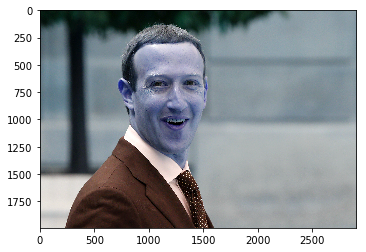

In [77]:
img = cv2.imread('zuck.jpg')
img.shape
plt.imshow(img)
plt.show()

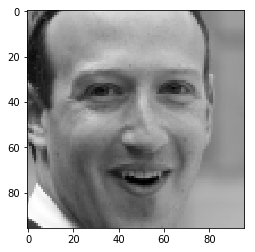

In [78]:
#img = cv2.resize(img,(96,96),interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(gray,1.3,5)
roi_gray = []
for x,y,w,h in face:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    roi_gray = gray[y:y+h,x:x+h]
    #plt.imshow(img)
    #plt.show()
roi_gray = np.array(roi_gray)
roi_gray = cv2.resize(roi_gray,(96,96),interpolation = cv2.INTER_AREA)
plt.imshow(roi_gray,cmap='gray')
plt.show()

In [79]:
preds = final_model.predict(roi_gray.reshape(1,96,96,1))

In [80]:
preds
pred = preds.reshape(30,)
pred.shape,preds.shape

((30,), (1, 30))

In [81]:
print(pred)
x = pred[::2]
y = pred[1::2]

[68.54721  38.687088 32.381744 39.824905 61.434296 37.932125 75.279686
 36.491226 38.33636  39.568657 23.65179  40.820347 56.55207  31.31423
 82.62899  30.280186 40.691418 32.39576  15.916979 35.070343 49.7099
 62.955345 70.95291  74.77438  35.150658 78.286705 51.558563 75.751366
 50.986423 81.15952 ]


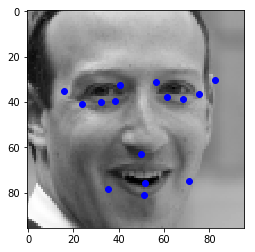

In [82]:
plt.imshow(roi_gray,cmap='gray')
plt.scatter(x,y,c='b')
plt.show()

In [83]:
import os

In [91]:
os.listdir(')

NotADirectoryError: [WinError 267] The directory name is invalid: 'images/sunglasses.png'